# Housing prices prediction using LR

### Boston Houses Dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [49]:
housing = fetch_california_housing()

X = housing.data
y = housing.target

In [50]:
print(X.shape, y.shape)

(20640, 8) (20640,)


In [51]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

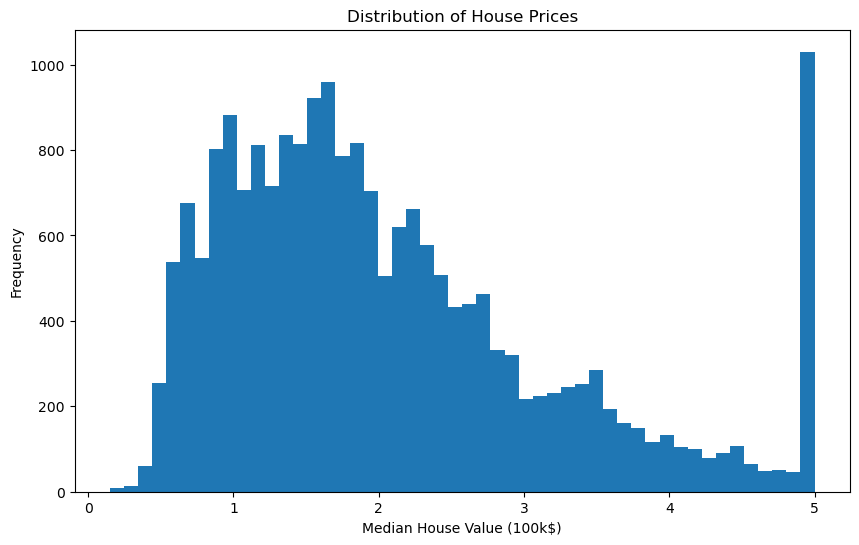

In [52]:
# Training Case Output y
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value (100k$)')
plt.ylabel('Frequency')
plt.show()

In [53]:
df = pd.DataFrame(X, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [54]:
#Normalizing the data
#Each feature must have 0 mean and unit variance
u = np.mean(X, axis=0)
std = np.std(X, axis=0)
print(u.shape, std.shape)

(8,) (8,)


In [55]:
#Normalized data
X = (X - u) / std
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


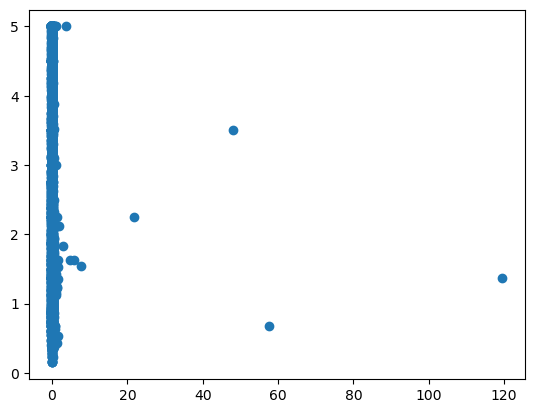

In [56]:
#Plot Y vs any feature
plt.scatter(X[:, 5], y)

### Implementing Linear Regression on multiple features dataset

In [57]:
#Our hypothesis function would have 9 parameters (8 features + 1 bias)
print(X.shape, y.shape)

ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print(X[:4,:4])

(20640, 8) (20640,)
[[ 1.          2.34476576  0.98214266  0.62855945]
 [ 1.          2.33223796 -0.60701891  0.32704136]
 [ 1.          1.7826994   1.85618152  1.15562047]
 [ 1.          0.93296751  1.85618152  0.15696608]]


In [59]:
# X - Matrix (m * n)
# x - Vector (Single Example with n features)

def  hypotheses(x, theta):
    y_=0.0
    n = x.shape[0]
    for i in range(n):
        y_ += theta[i] * x[i]
    return y_


def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    for i in range(m):
        y_ = hypotheses(X[i], theta)
        e += (y_ - y[i])**2
    return e/m


def gradient(X,y,theta):
    m, n = X.shape
    grad = np.zeros((n,))
    for j in range(n):
        for i in range(m):
            y_ = hypotheses(X[i], theta)
            grad[j] += (y_ - y[i]) * X[i][j]
        #grad[j] = (2/m) * grad[j]
    return grad/m


def gradient_descent(X,y, lr=0.1, epochs=300):
    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        theta = theta - lr * grad
        
    return theta, error_list


In [60]:
theta, error_list = gradient_descent(X,y, lr=0.1, epochs=300)

### This approach is quite slow, Took 1.5 mins to train the data

In [61]:
print(theta)

[ 2.06855817e+00  8.43400811e-01  1.33081686e-01 -2.69595327e-01
  2.99398803e-01  5.31172189e-04 -4.08323317e-02 -7.82482676e-01
 -7.53679217e-01]


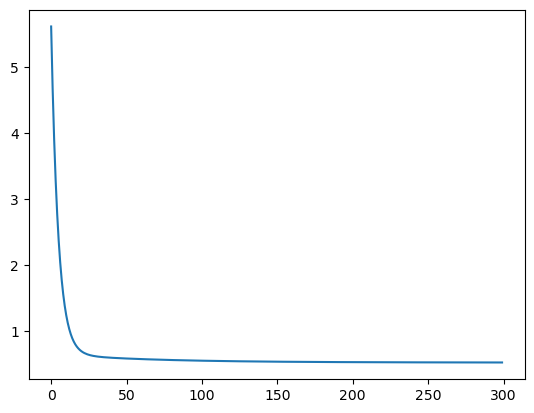

In [62]:
plt.plot(error_list)

### Predictions and Accuracy

In [64]:
y_ = []

for i in range(X.shape[0]):
    pred = hypotheses(X[i], theta)
    y_.append(pred)
y_ = np.array(y_)


In [ ]:
#Score of the algorithm

def r2_score(Y,Y_):
    num = np.sum((Y - Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = 1 - (num/denom)
    return score*100

r2_score(y, y_)

np.float64(60.49796286837967)